   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


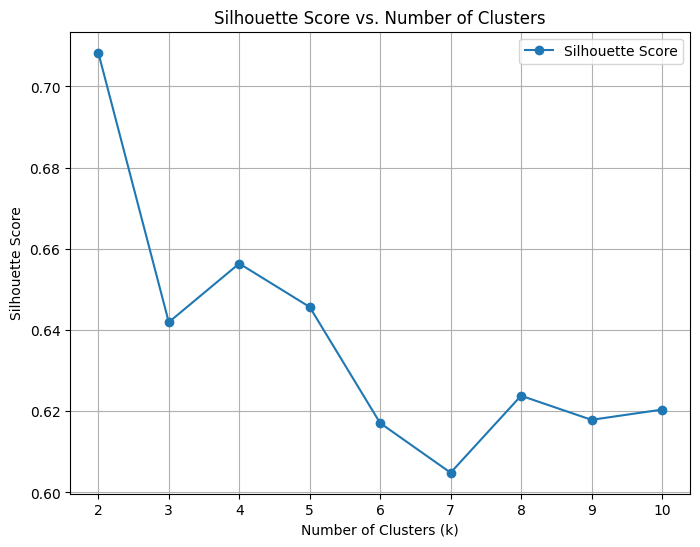

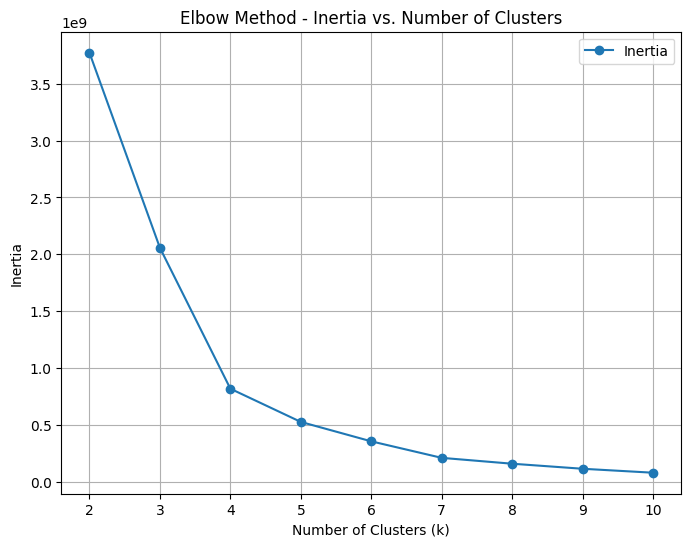

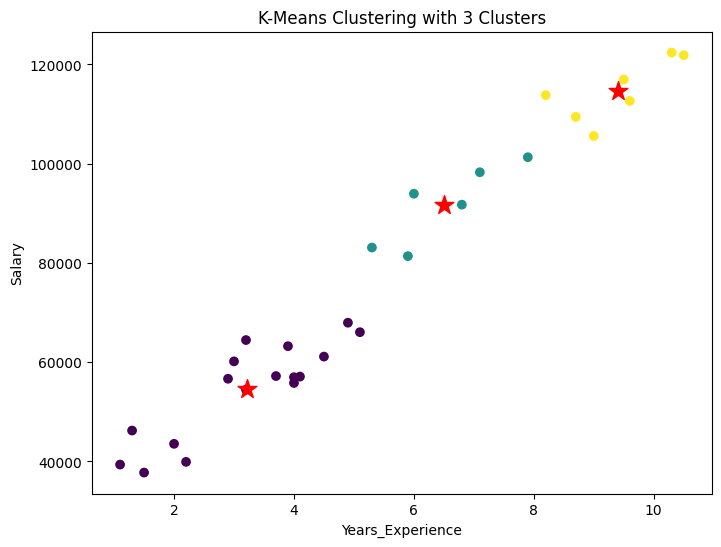

In [ ]:
# @title Optimal K Values for 2 Feature values
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASET/Salary_Data.csv")

print(data.head())
X = data.values

#range of k value
k_range = range(2, 11)
# Lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

for k in k_range:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to your data
    kmeans.fit(X)
    # Calculate silhouette score
    silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_score)
    # Calculate inertia (within-cluster variance)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
# Silhouette Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model to your data
kmeans.fit(X)
# Get cluster labels for each data point
labels = kmeans.labels_
# Get cluster centers
centers = kmeans.cluster_centers_

# Plot the data points with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='*', color='red', s=200)
# Add labels and title
plt.xlabel('Years_Experience')
plt.ylabel('Salary')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()


 Optimal K Values for 2 or more Feature Values

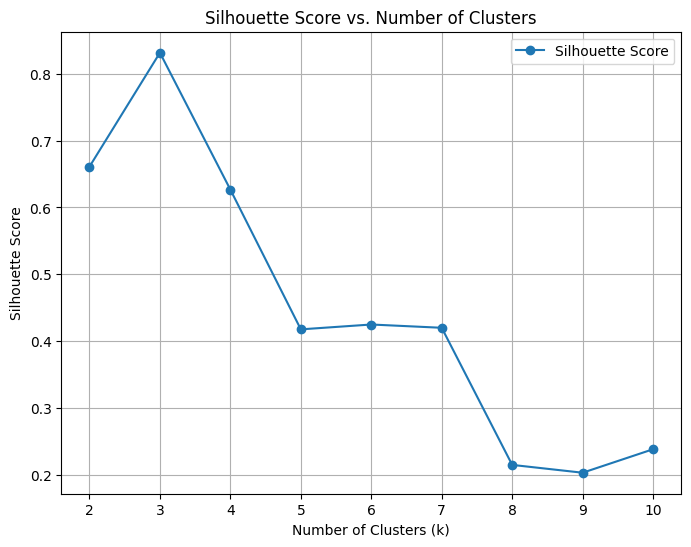

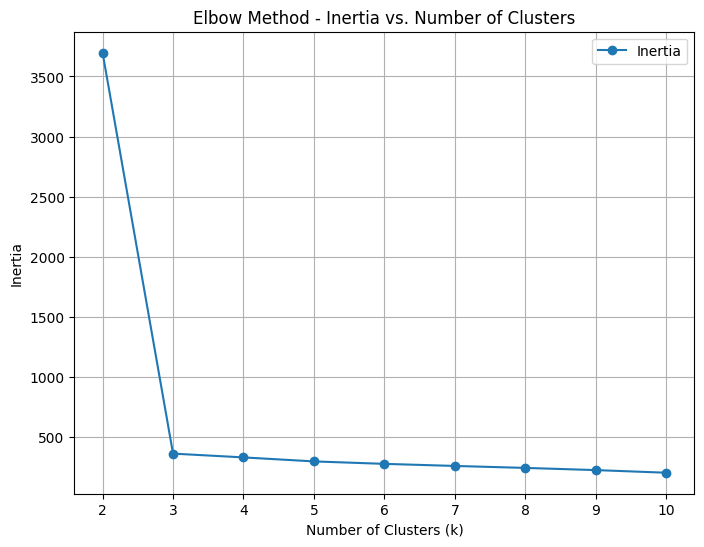

     Feat_1    Feat_2     Feat_3    Feat_4  Cluster
0 -8.904770 -6.693655  -9.500114  8.175956        1
1  2.119976  3.388442  -9.563800  9.896195        2
2 -6.619744 -6.098287 -10.075278  6.003066        1
3 -6.521840 -6.319325  -7.755277  8.377325        1
4  2.098105  3.484290  -8.613190  9.251140        2


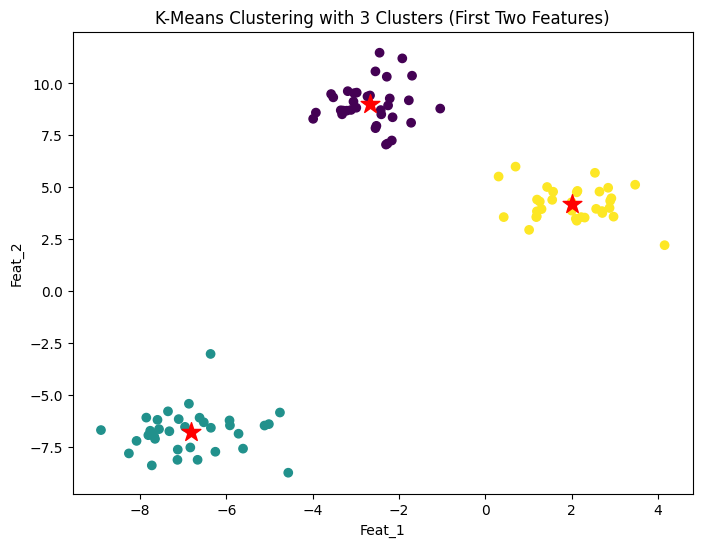

In [ ]:
# @title Optimal K Values for 2 or more Feature Values
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, n_features=4, random_state=42)
# Create a pandas DataFrame
df = pd.DataFrame(X, columns=['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4'])

# Range of k values
k_range = range(2, 11)
# Lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

for k in k_range:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to your data
    kmeans.fit(df)
    # Calculate silhouette score
    silhouette_score = metrics.silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_score)
    # Calculate inertia (within-cluster variance)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Silhouette Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Choose the optimal number of clusters (for example, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model to your data
y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])
df['Cluster'] = y

print(df.head())



# Plot the data points with different colors for each cluster using the first two features
plt.figure(figsize=(8, 6))
plt.scatter(df['Feat_1'], df['Feat_2'], c=df['Cluster'], cmap='viridis')
# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', color='red', s=200)
# Add labels and title
plt.xlabel('Feat_1')
plt.ylabel('Feat_2')
plt.title('K-Means Clustering with 3 Clusters (First Two Features)')
plt.show()


In [ ]:
# @title Default title text
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler # Import StandardScaler

X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0) # Use db.labels_
n_noise_ = list(db.labels_).count(-1) # Use db.labels_
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, db.labels_):.3f}") # Use db.labels_

Estimated number of clusters: 1
Estimated number of noise points: 82
Silhouette Coefficient: 0.204
